# Задача Дирихле#
## Вариант 2 ##
## Проект Егора Емелина 778##

 Дана следующуя задача: задача Дирихле для уравнения Пуассона в единичном квадрате $0<x<1; 0<y<1$.
 
 $\frac{\partial}{\partial x}(u^{\alpha}\frac{\partial u}{\partial x}) +\frac{\partial}{\partial y}(u^{\alpha}\frac{\partial u}{\partial y}) = f(x,y),\; 0<x<1; 0<y<1;$
 
 $u(x,0) = (sin(\pi y))^{0.5}; u(x,1) = (sin(\pi y))^{0.5}$
 
 $u(0,y) = 0; u(1,y) = 0$
 
 $f(x,y) = -\frac{5\pi^2}{8}sin(\pi x)[sin(\frac{\pi y}{2})+cos(\frac{\pi y}{2})]$.
 
Методом разделения переменных получим точное решение. Для начала сделаем замену : $W = u^{2}$. Получаем, что $W = sin(\pi x)[sin(\frac{\pi y}{2})+cos(\frac{\pi y}{2})]$. Тогда $u = (sin(\pi x)[sin(\frac{\pi y}{2})+cos(\frac{\pi y}{2})])^{0.5}$.
 
Покажем точное решение графически.

ТОЧНОЕ РЕШЕНИЕ с заменой переменной:
[[0.    0.    0.    0.    0.    0.   ]
 [0.767 0.861 0.906 0.906 0.861 0.767]
 [0.975 1.095 1.153 1.153 1.095 0.975]
 [0.975 1.095 1.153 1.153 1.095 0.975]
 [0.767 0.861 0.906 0.906 0.861 0.767]
 [0.    0.    0.    0.    0.    0.   ]]


Text(0.5, 0, 'y')

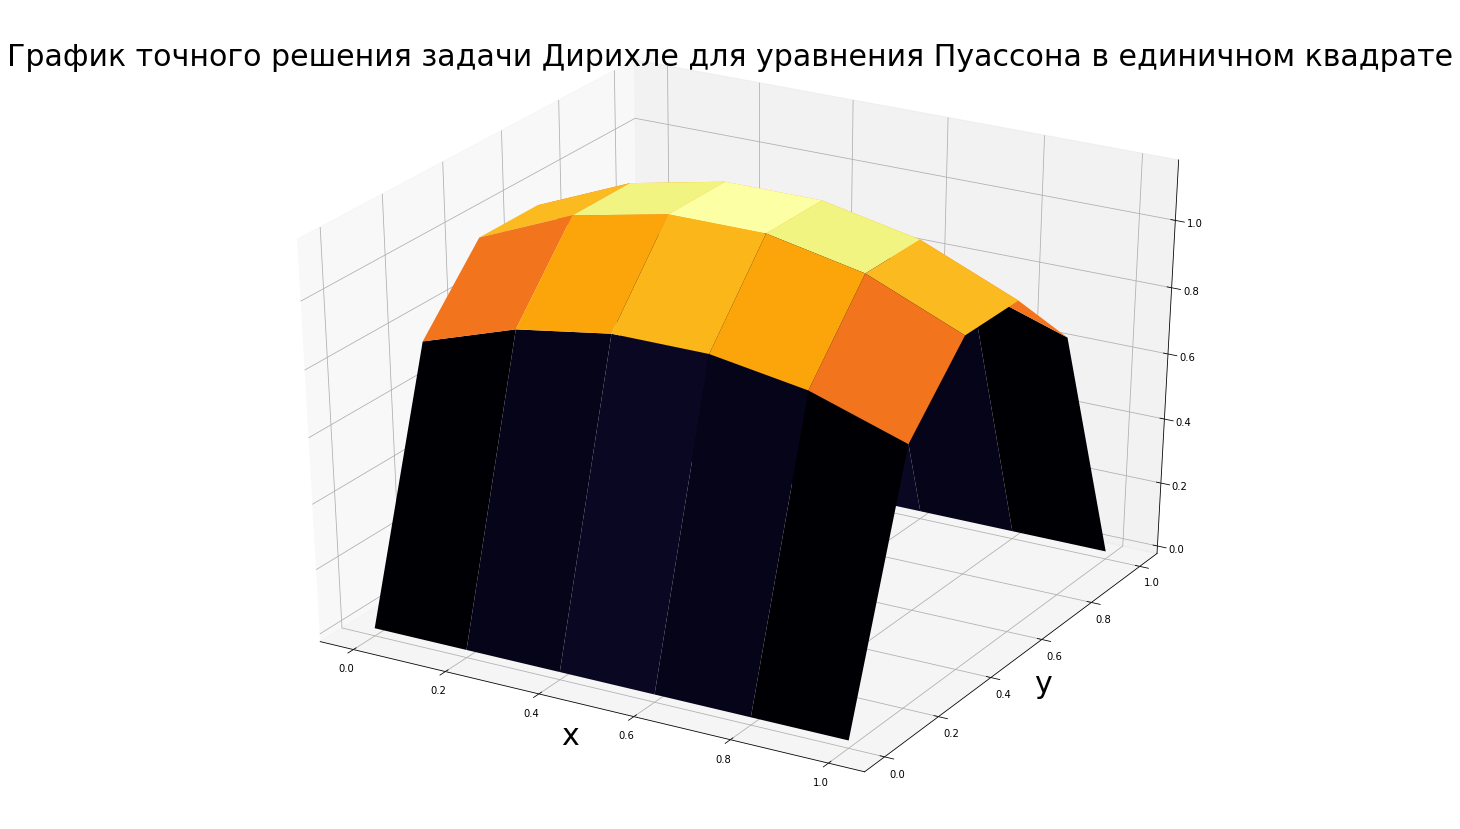

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
from numpy import linalg as ln

ans = np.zeros((K,K))
ans1 = np.zeros((K,K))

for i in range (0,K):
    for j in range (0,K):
        ans[i,j] = (math.sin(math.pi*(i)*h)*(math.sin(math.pi*(j)*h/2)+math.cos(math.pi*(j)*h/2)))**(0.5)

print("ТОЧНОЕ РЕШЕНИЕ с заменой переменной:")

for i in range (0,K):
    for j in range (0,K):
        ans1[i][j] = round(ans[i][j],3)

print(ans1)



x = np.linspace(0,1,6)
y0=np.zeros(K)
y1=np.ones(K)
y = [y0,0.2*y1,0.4*y1,0.6*y1,0.8*y1,y1]
z = ans
fig = plt.figure(figsize=(20, 15))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='r',cmap='inferno')
plt.title('График точного решения задачи Дирихле для уравнения Пуассона в единичном квадрате', fontsize=30)
plt.xlabel("x",fontsize=30)
plt.ylabel("y",fontsize=30)

##  Разностная схема##

Для решения задачи воспользуемся схемой "крест". 

 $\frac{\partial}{\partial x}(u\frac{\partial u}{\partial x})\approx \frac{1}{h}(u_{m+0.5,n}\frac{u_{m+1,n}-u_{m,n}}{h}-u_{m-0.5,n}\frac{u_{m,n}-u_{m-1,n}}{h})$
 
  $\frac{\partial}{\partial y}(u\frac{\partial u}{\partial y})\approx \frac{1}{h}(u_{m,n+0.5}\frac{u_{m,n+1}-u_{m,n}}{h}-u_{m,n-0.5}\frac{u_{m,n}-u_{m,n-1}}{h})$
  
Берем срденее значение для точек в середине узлов, получаем:

$\frac{1}{8h^2}((u_{m+1,n}^2 - u_{m,n}^2)+(u_{m,n}^2 - u_{m-1,n}^2)+(u_{m,n+1}^2 - u_{m,n}^2)+(u_{m,n}^2 - u_{m,n-1}^2)) =$

$= -\frac{5\pi^2}{8}sin(\pi x)[sin(\frac{\pi y}{2})+cos(\frac{\pi y}{2})]$$\;\;(1)$

## Метод установления##

Добавляем в (1) производную по времени $\frac{\partial u}{\partial t} = \frac{u^{t+1}-u^t}{\tau}$, получаем:

$u^{t+1} - u^{t} - \frac{\tau}{8h^2}((u_{m+1,n} - u_{m,n})(u_{m+1,n} + u_{m,n})+ (u_{m,n} - u_{m-1,n})(u_{m,n} + u_{m-1,n})+(u_{m,n+1} - u_{m,n})(u_{m,n+1} + u_{m,n})+$

$+(u_{m,n} + u_{m,n-1})(u_{m,n} + u_{m,n-1})) = -\frac{5\pi^2}{8}sin(\pi x)[sin(\frac{\pi y}{2})+cos(\frac{\pi y}{2})]$.

 Возьмем шаг $h = 0.2$.
 
 $l\approx 2\pi^2 ; L \approx \frac{8}{h^2}; \tau_{opt} = \frac{2}{l+L}\approx \frac{1}{4h^2}$.
 
Для достижения $1\%$ точности нужно
 
 $N\geq \frac{ln\epsilon}{ln\frac{1-\frac{l}{L}}{1+\frac{l}{L}}}\geq 24$.
 
 Реализуем данный алгоритм:

Для начала осуществим расчеты при разных пространственных шагах расчетной сетки, последовательно удваивая их число, вплоть до достижения 1% точности по правилу Рунге.

In [17]:
import numpy as np
import math
from numpy import linalg as ln
from tqdm import tqdm
import time

h1 = [0.2/2**4,0.2/2**3,0.2/2**2,0.2/2**1,0.2]
err = []
tm = []

for h in h1:
    start_time = time.time()
    K = int(round(1/h)+1)
    f = np.zeros((K,K))
    u0 = np.zeros((K,K))
    u1= np.zeros((K,K))
    error= np.zeros((K,K))
    margin = []
    margin.append(100)
    ans = np.zeros((K,K))
    ans1 = np.zeros((K,K))

    for i in range (0,K):
        for j in range (0,K):
            ans[i,j] = (math.sin(math.pi*(i)*h)*(math.sin(math.pi*(j)*h/2)+math.cos(math.pi*(j)*h/2)))**(0.5)

    for i in range (0,K):
        for j in range (0,K):
            f[i,j] = -5*math.pi*math.pi/8*math.sin(math.pi*(i)*h)*(math.sin(math.pi*(j)*h/2)+math.cos(math.pi*(j)*h/2))    

    tau = 1/4*h**2
    eps = 0.01
    N = math.log(eps)/math.log((1-math.pi**2*h**2/4)/(1+math.pi**2*h**2/4))
    N = round(N) + 1


    for j in range (0,K):
            u0[0,j] = 0

    for j in range (0,K):
            u0[K-1,j] = 0


    for i in range (0,K):
            u0[i,0] = math.sin(math.pi*(i)*h)**0.5

    for i in range (0,K):
            u0[i,K-1] = math.sin(math.pi*(i)*h)**0.5


    u1 = u0

    for l in range (0,N):
        for i in range (1,K-1):
            for j in range (1,K-1):
                u1[i,j] = u0[i,j] + tau/2/h/h*((u0[i+1,j])**2+(u0[i-1,j])**2+(u0[i,j-1])**2+(u0[i,j+1])**2-4*(u0[i,j])**2)-tau*f[i,j]
        q = 0
        for m in range (0,K):
            for n in range (0,K):
                error[m,n] = abs(ans[m,n]-u1[m,n])
        for m in range(K):
            if (max(error[m]) > q):
                q = max(error[i])
                q = q*100
        margin.append(q)
        u0 = u1

    error= np.zeros((K,K))

    for i in range (0,K):
        for j in range (0,K):
            error[i,j] = abs(ans[i,j]-u1[i,j])


    k = 0
    for i in range(K):
        if (max(error[i]) > k):
            k = max(error[i])
    
    err.append(k)
    tm.append(time.time() - start_time)

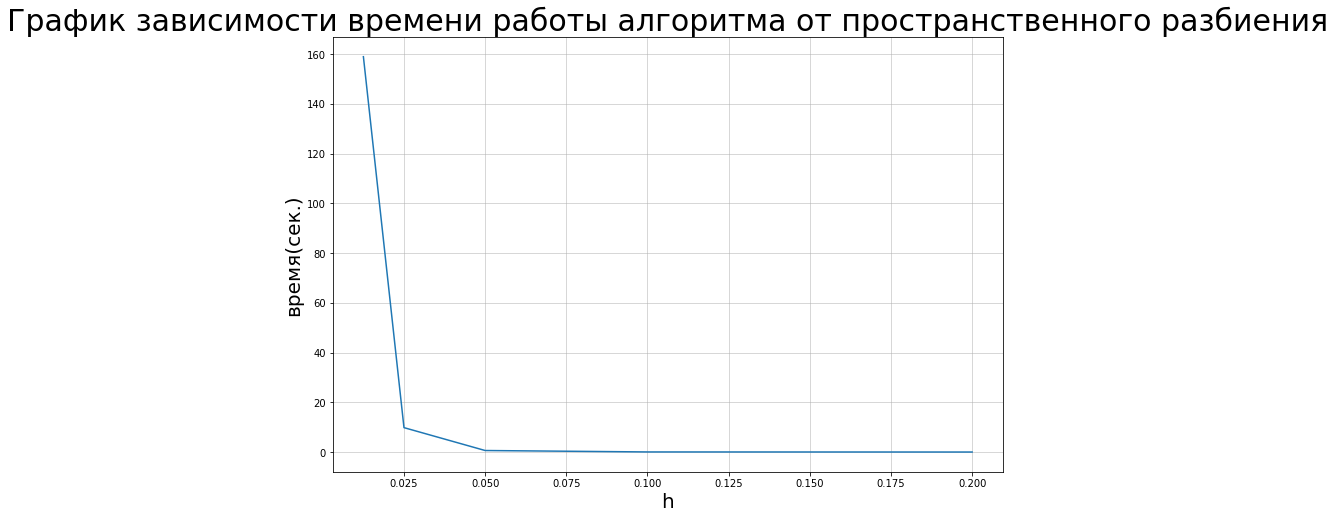

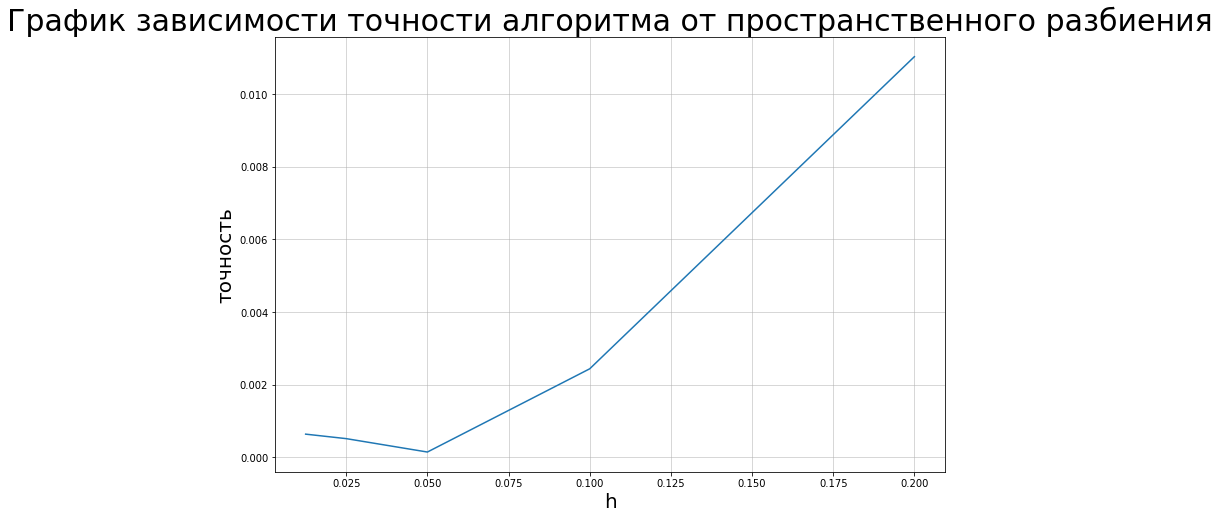

In [671]:
plt.figure(figsize=(12, 8))
plt.xlabel("h",fontsize=20)
plt.ylabel("время(сек.)",fontsize=20)
plt.plot(h1, tm)
plt.title("График зависимости времени работы алгоритма от пространственного разбиения", fontsize=30)
plt.grid(linewidth = 0.5)
plt.show()

plt.figure(figsize=(12, 8))
plt.xlabel("h",fontsize=20)
plt.ylabel("точность",fontsize=20)
plt.plot(h1, err)
plt.title("График зависимости точности алгоритма от пространственного разбиения", fontsize=30)
plt.grid(linewidth = 0.5)
plt.show()

Видно, что точность $1\%$ достигается при величине пространственного шага $h=0.2$. При этом из графика видно, что точность линейно возрастает при росте пространственного шага, но время работы алгоритма экспонентциально убывает при этом.

РЕШЕНИЕ методом установления:
[[0.    0.    0.    0.    0.    0.   ]
 [0.767 0.867 0.915 0.915 0.867 0.767]
 [0.975 1.103 1.164 1.164 1.103 0.975]
 [0.975 1.103 1.164 1.164 1.103 0.975]
 [0.767 0.867 0.915 0.915 0.867 0.767]
 [0.    0.    0.    0.    0.    0.   ]]
НЕВЯЗКА с точным решением:
[[0.    0.    0.    0.    0.    0.   ]
 [0.    0.006 0.008 0.009 0.006 0.   ]
 [0.    0.008 0.011 0.011 0.008 0.   ]
 [0.    0.008 0.011 0.011 0.008 0.   ]
 [0.    0.006 0.009 0.009 0.006 0.   ]
 [0.    0.    0.    0.    0.    0.   ]]
ОШИБКА алгоритма:
0.01104


Text(0.5, 0, 'y')

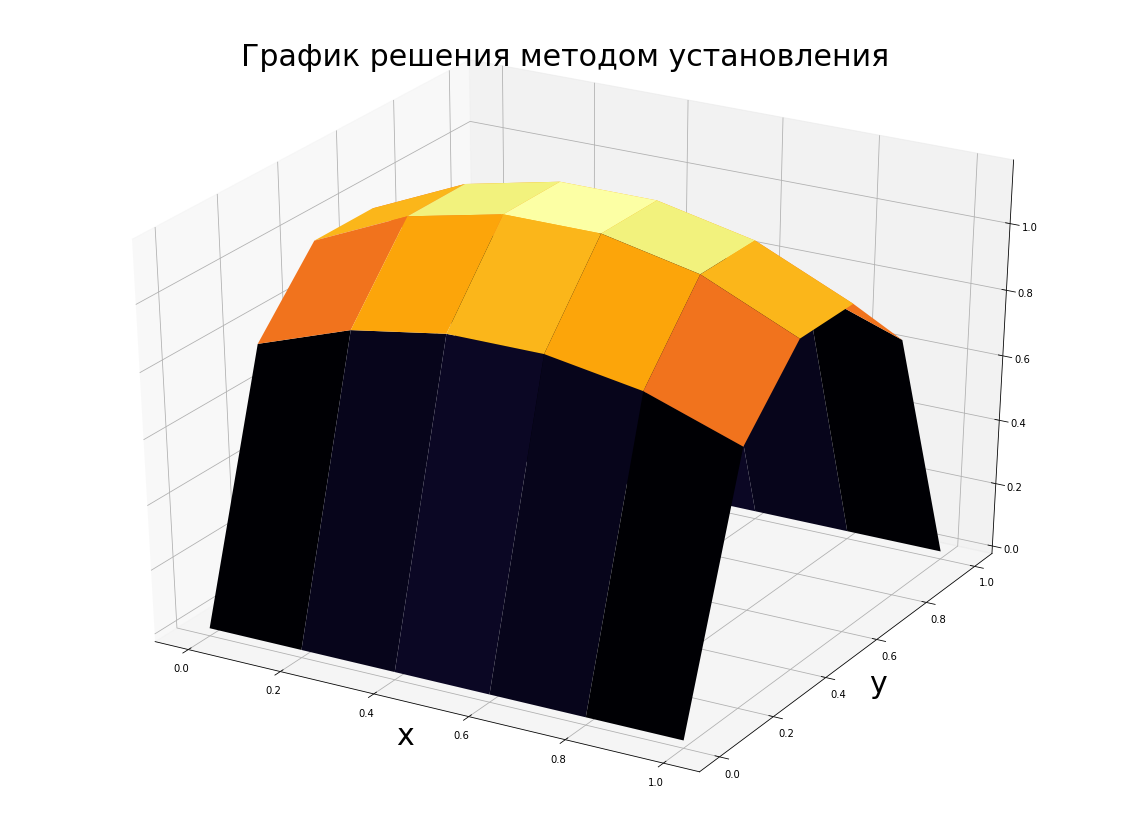

In [7]:
import numpy as np
import math
from numpy import linalg as ln

K = 6
h = 0.2
f = np.zeros((K,K))
u0 = np.zeros((K,K))
u1= np.zeros((K,K))
margin = []
margin.append(100)
error= np.zeros((K,K))

for i in range (0,K):
    for j in range (0,K):
        f[i,j] = -5*math.pi*math.pi/8*math.sin(math.pi*(i)*h)*(math.sin(math.pi*(j)*h/2)+math.cos(math.pi*(j)*h/2))    
        
tau = 1/4*h**2
eps = 0.01
N = math.log(eps)/math.log((1-math.pi**2*h**2/4)/(1+math.pi**2*h**2/4))
N = round(N) + 1


for j in range (0,K):
        u0[0,j] = 0
        
for j in range (0,K):
        u0[K-1,j] = 0


for i in range (0,K):
        u0[i,0] = math.sin(math.pi*(i)*h)**0.5
        
for i in range (0,K):
        u0[i,K-1] = math.sin(math.pi*(i)*h)**0.5


u1 = u0

for l in range (0,N):
    for i in range (1,K-1):
        for j in range (1,K-1):
            u1[i,j] = u0[i,j] + tau/2/h/h*((u0[i+1,j])**2+(u0[i-1,j])**2+(u0[i,j-1])**2+(u0[i,j+1])**2-4*(u0[i,j])**2)-tau*f[i,j]
    q = 0
    for m in range (0,K):
        for n in range (0,K):
            error[m,n] = abs(ans[m,n]-u1[m,n])
    for m in range(K):
        if (max(error[m]) > q):
            q = max(error[i])
            q = q*100
    margin.append(q)
    u0 = u1

error= np.zeros((K,K))

for i in range (0,K):
    for j in range (0,K):
        error[i,j] = abs(ans[i,j]-u1[i,j])


print("РЕШЕНИЕ методом установления:")

for i in range (0,K):
    for j in range (0,K):
        ans1[i][j] = round(u1[i][j],3)

print(ans1)

print("НЕВЯЗКА с точным решением:")

for i in range (0,K):
    for j in range (0,K):
        ans1[i][j] = round(error[i][j],3)

print(ans1)

k = 0
for i in range(K):
    if (max(error[i]) > k):
        k = max(error[i])
        
print("ОШИБКА алгоритма:")        
print(round(k,5))

x = np.linspace(0,1,6)
y0=np.zeros(K)
y1=np.ones(K)
y = [y0,0.2*y1,0.4*y1,0.6*y1,0.8*y1,y1]
z = u1
fig = plt.figure(figsize=(20, 15))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='inferno')
plt.title('График решения методом установления', fontsize=30)
plt.xlabel("x",fontsize=30)
plt.ylabel("y",fontsize=30)

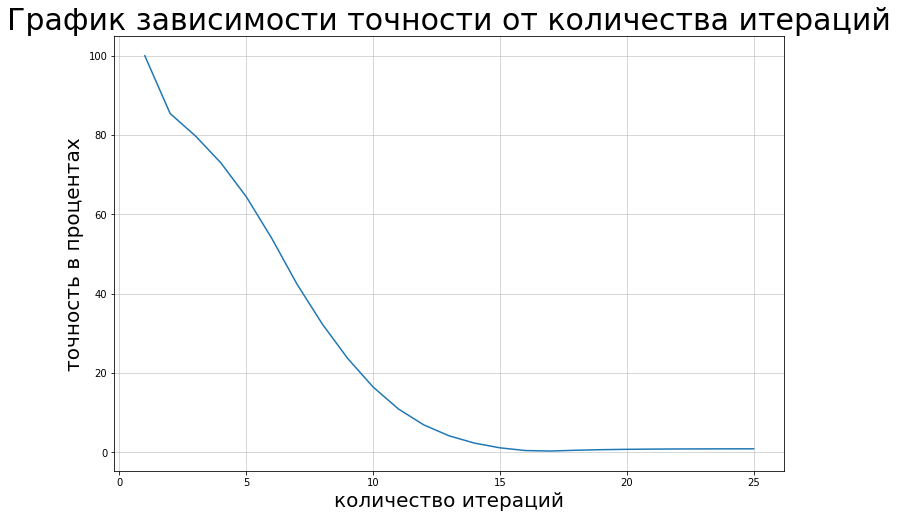

In [674]:
x = np.linspace(1,N+1,N+1)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(x,margin)
plt.xlabel("количество итераций",fontsize=20)
plt.ylabel("точность в процентах",fontsize=20)
plt.title("График зависимости точности от количества итераций", fontsize=30)
plt.grid(linewidth = 0.5)
plt.show()

## Метод Якоби ##

Заменяем $u_{m,n}\rightarrow u_{m,n}^{t+1}$, а все остальное таким образом : $u_{*,*}\rightarrow u_{*,*}^t$. Получаем:

${u_{m,n}^{t+1}}^2 = \frac{1}{4}({u_{m+1,n}^{t}}^2+{u_{m-1,n}^{t}}^2+{u_{m,n+1}^{t}}^2+{u_{m,n-1}^{t}}^2) - \frac{1}{2h^2}f_{m,n}$.

Реализуем данный алгоритм, взяв шаг $h = 0.2$:

РЕШЕНИЕ методом Якоби:
[[0.    0.    0.    0.    0.    0.   ]
 [0.767 0.867 0.915 0.915 0.867 0.767]
 [0.975 1.103 1.164 1.164 1.103 0.975]
 [0.975 1.103 1.164 1.164 1.103 0.975]
 [0.767 0.867 0.915 0.915 0.867 0.767]
 [0.    0.    0.    0.    0.    0.   ]]
НЕВЯЗКА с точным решением:
[[0.    0.    0.    0.    0.    0.   ]
 [0.    0.006 0.009 0.009 0.006 0.   ]
 [0.    0.008 0.011 0.011 0.008 0.   ]
 [0.    0.008 0.011 0.011 0.008 0.   ]
 [0.    0.006 0.009 0.009 0.006 0.   ]
 [0.    0.    0.    0.    0.    0.   ]]
ОШИБКА алгоритма:
0.01118


Text(0.5, 0, 'y')

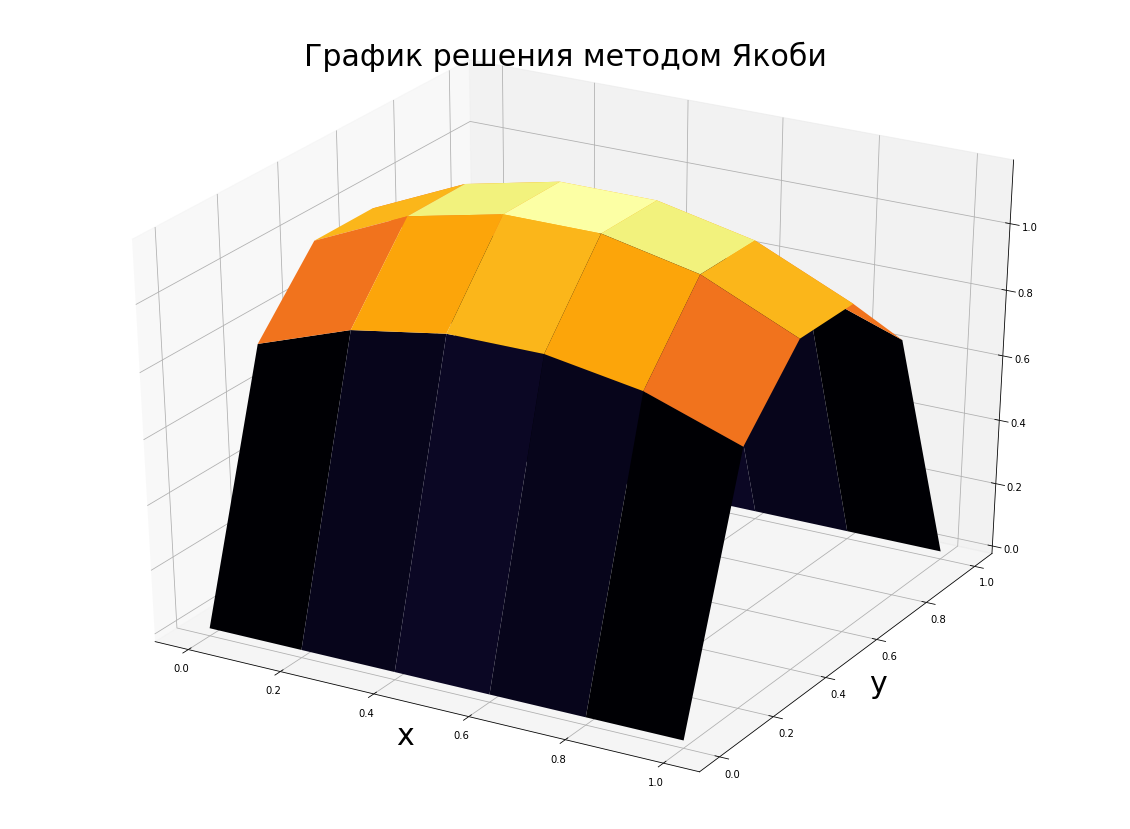

In [9]:
import numpy as np
import math
from numpy import linalg as ln

K = 6
h = 0.2
f = np.zeros((K,K))
u0 = np.zeros((K,K))
u1= np.zeros((K,K))
margin2 = []
margin2.append(100)
error= np.zeros((K,K))

for i in range (0,K):
    for j in range (0,K):
        f[i,j] = -5*math.pi*math.pi/8*math.sin(math.pi*(i)*h)*(math.sin(math.pi*(j)*h/2)+math.cos(math.pi*(j)*h/2))
        
        
tau = 1/4*h**2
eps = 0.01
N = math.log(eps)/math.log((1-math.pi**2*h**2/4)/(1+math.pi**2*h**2/4))
N = round(N) + 1


for j in range (0,K):
        u0[0,j] = 0
        
for j in range (0,K):
        u0[K-1,j] = 0


for i in range (0,K):
        u0[i,0] = math.sin(math.pi*(i)*h)**0.5
        
for i in range (0,K):
        u0[i,K-1] = math.sin(math.pi*(i)*h)**0.5


u1 = u0

for l in range (0,N):
    for i in range (1,K-1):
        for j in range (1,K-1):
            u1[i,j] = ((u0[i+1,j]**2+u0[i-1,j]**2+u0[i,j-1]**2+u0[i,j+1]**2)/4-f[i,j]*h*h/2)**0.5
    q = 0
    for m in range (0,K):
        for n in range (0,K):
            error[m,n] = abs(ans[m,n]-u1[m,n])
    for m in range(K):
        if (max(error[m]) > q):
            q = max(error[i])
            q = q*100
    margin2.append(q)
    u0 = u1

error= np.zeros((K,K))


for i in range (0,K):
    for j in range (0,K):
        error[i,j] = abs(ans[i,j]-u1[i,j])
        
        
print("РЕШЕНИЕ методом Якоби:")

for i in range (0,K):
    for j in range (0,K):
        ans1[i][j] = round(u1[i][j],3)

print(ans1)

print("НЕВЯЗКА с точным решением:")

for i in range (0,K):
    for j in range (0,K):
        ans1[i][j] = round(error[i][j],3)

print(ans1)

k = 0
for i in range(K):
    if (max(error[i]) > k):
        k = max(error[i])
        
print("ОШИБКА алгоритма:")        
print(round(k,5))

x = np.linspace(0,1,6)
y0=np.zeros(K)
y1=np.ones(K)
y = [y0,0.2*y1,0.4*y1,0.6*y1,0.8*y1,y1]
z = u1
fig = plt.figure(figsize=(20, 15))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='r',cmap='inferno')
plt.title('График решения методом Якоби', fontsize=30)
plt.xlabel("x",fontsize=30)
plt.ylabel("y",fontsize=30)

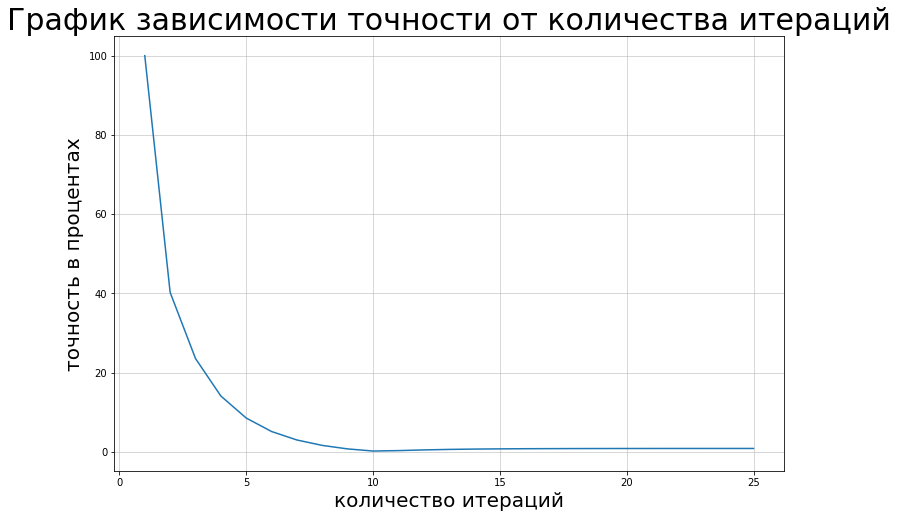

In [686]:
x1 = np.linspace(1,N+1,N+1)
plt.figure(figsize=(12, 8))
plt.plot(x1,margin2)
plt.xlabel("количество итераций",fontsize=20)
plt.ylabel("точность в процентах",fontsize=20)
plt.title("График зависимости точности от количества итераций", fontsize=30)
plt.grid(linewidth = 0.5)
plt.show()

Интересно сравнить метод Якоби и метод установления по скорости сходимости и точности ответа.

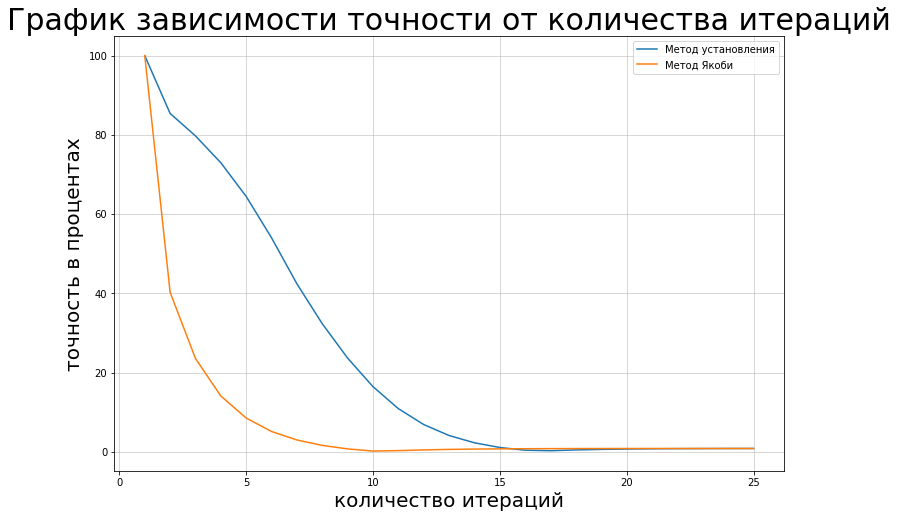

In [687]:
plt.figure(figsize=(12, 8))
plt.xlabel("количество итераций",fontsize=20)
plt.ylabel("точность в процентах",fontsize=20)
plt.plot(x1, margin,label='Метод установления',markersize = 10)
plt.plot(x1, margin2,label='Метод Якоби',markersize = 10)
plt.title("График зависимости точности от количества итераций", fontsize=30)
plt.legend()
plt.grid(linewidth = 0.5)
plt.show()

По графику видно, что метод Якоби сходится быстрее, при этом стоит отметить, что метод установления оказался точнее. Важно подчеркнуть, что выбор алгоритма зависит от того, что стоит в решении задачи больше в приоритете : быстрота алгоритма или его точность.

Теперь применим метод установления для уравнения гиперболического типа.

 $\frac{\partial}{\partial x}(u^{\alpha}\frac{\partial u}{\partial x}) -\frac{\partial}{\partial y}(u^{\alpha}\frac{\partial u}{\partial y}) = f(x,y),\; 0<x<1; 0<y<1;$
 
 $u(x,0) = 5/3*(sin(\pi y))^{0.5}; u(x,1) = 5/3*(sin(\pi y))^{0.5}$
 
 $u(0,y) = 0; u(1,y) = 0$
 
 $f(x,y) = -\frac{5\pi^2}{8}sin(\pi x)[sin(\frac{\pi y}{2})+cos(\frac{\pi y}{2})]$.

РЕШЕНИЕ методом установления:
[[0.    0.    0.    0.    0.    0.   ]
 [1.278 0.931 0.757 0.757 0.931 1.278]
 [1.625 0.945 0.669 0.669 0.945 1.625]
 [1.625 0.873 0.605 0.605 0.873 1.625]
 [1.278 0.584 0.356 0.356 0.584 1.278]
 [0.    0.    0.    0.    0.    0.   ]]


Text(0.5, 0, 'y')

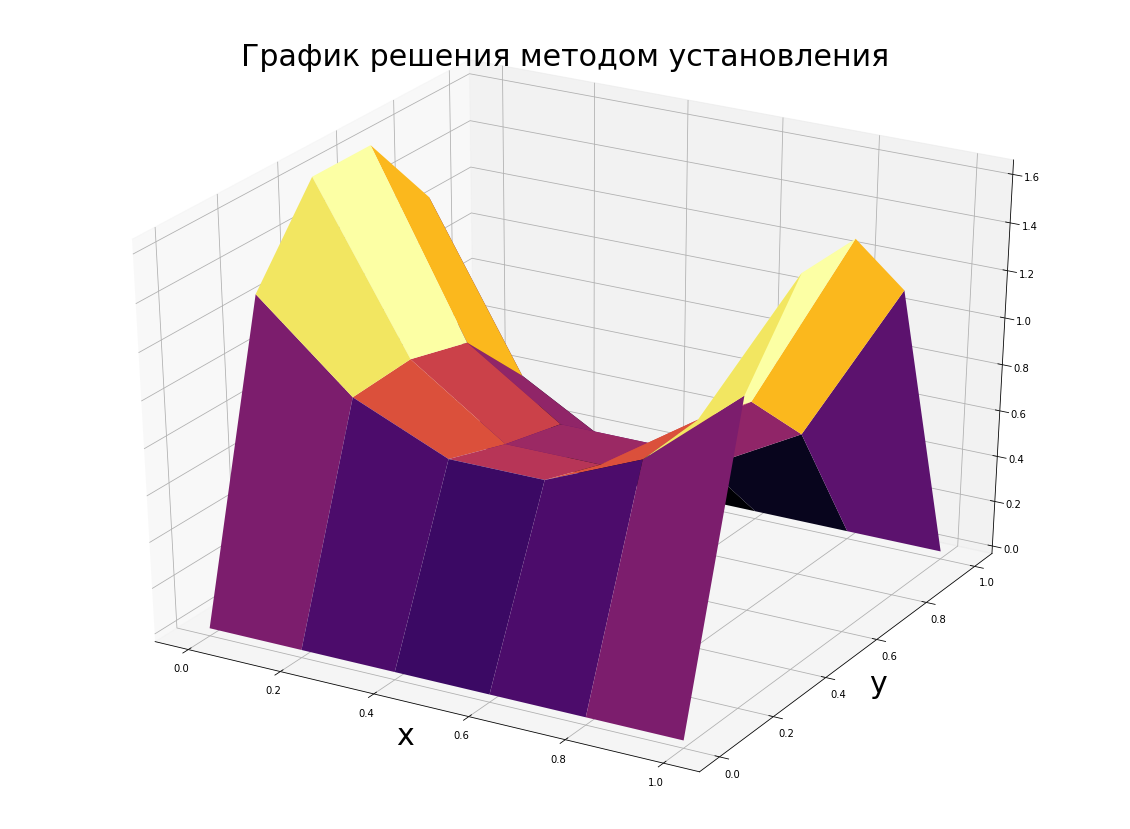

In [61]:
import numpy as np
import math
from numpy import linalg as ln
import copy

K = 6
h = 0.2
f = np.zeros((K,K))
u0 = np.zeros((K,K))
u1= np.zeros((K,K))
margin = []
margin.append(100)
error= np.zeros((K,K))

for i in range (0,K):
    for j in range (0,K):
        f[i,j] = -5*math.pi*math.pi/8*math.sin(math.pi*(i)*h)*(math.sin(math.pi*(j)*h/2)+math.cos(math.pi*(j)*h/2))    
        
tau = 1/4*h**2
eps = 0.01
N = math.log(eps)/math.log((1-math.pi**2*h**2/4)/(1+math.pi**2*h**2/4))
N = round(N) + 1


for j in range (0,K):
        u0[0,j] = 0
        
for j in range (0,K):
        u0[K-1,j] = 0


for i in range (0,K):
        u0[i,0] = 5/3*math.sin(math.pi*(i)*h)**0.5
        
for i in range (0,K):
        u0[i,K-1] = 5/3*math.sin(math.pi*(i)*h)**0.5


u1 = u0

for l in range (0,N):
    for i in range (1,K-1):
        for j in range (1,K-1):
            u1[i,j] = u0[i,j] + tau/2/h/h*((-u0[i+1,j])**2-(u0[i-1,j])**2+(u0[i,j-1])**2+(u0[i,j+1])**2-4*(u0[i,j])**2)-tau*f[i,j]
    q = 0
    for m in range (0,K):
        for n in range (0,K):
            error[m,n] = abs(u1[m,n]-ans[m,n])
    for m in range(K):
        if (max(error[m]) > q):
            q = max(error[i])
            q = q*100
    margin.append(q)
    u0 = u1

error= np.zeros((K,K))

for i in range (0,K):
    for j in range (0,K):
        error[i,j] = abs(ans[i,j]-u1[i,j])


print("РЕШЕНИЕ методом установления:")

for i in range (0,K):
    for j in range (0,K):
        ans1[i][j] = round(u1[i][j],3)

print(ans1)


x = np.linspace(0,1,6)
y0=np.zeros(K)
y1=np.ones(K)
y = [y0,0.2*y1,0.4*y1,0.6*y1,0.8*y1,y1]
z = u1
fig = plt.figure(figsize=(20, 15))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='inferno')
plt.title('График решения методом установления', fontsize=30)
plt.xlabel("x",fontsize=30)
plt.ylabel("y",fontsize=30)

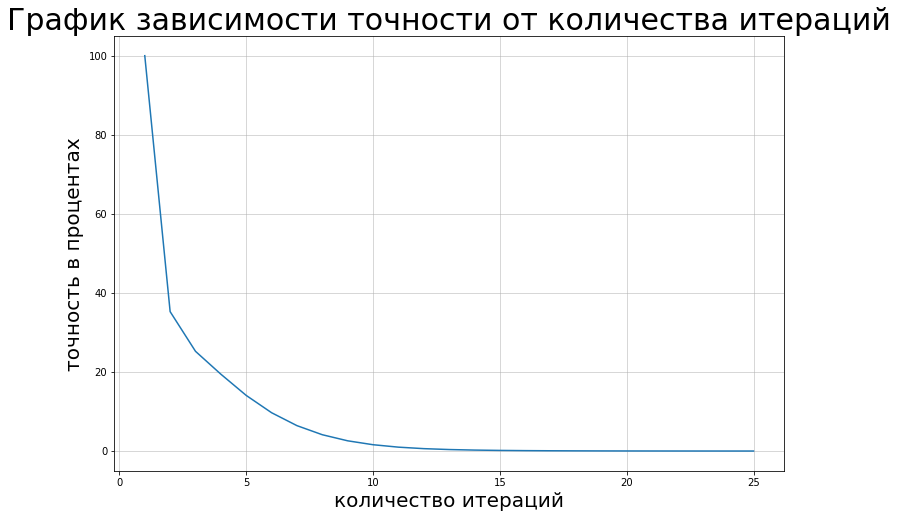

In [57]:
x = np.linspace(1,N+1,N+1)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(x,margin)
plt.xlabel("количество итераций",fontsize=20)
plt.ylabel("точность в процентах",fontsize=20)
plt.title("График зависимости точности от количества итераций", fontsize=30)
plt.grid(linewidth = 0.5)
plt.show()

## Вывод:##

Таким образом, мы рассмотрели два алгоритма(метод установления и метод Якоби) решения задачи Дирихле для уравнения Пуассона
(без замены искомой функции) в единичном квадрате. Осуществили расчеты при разных пространственных шагах и выяснили,
что алгоритмы достаточно быстро находят решение задачи с точностью $1\%$, достаточно взять шаг $h = 0.2$, то есть 
иcпользовать расчетную сетку размером $5\times 5$.  

## Литература ##

1. Е.Н. Аристова, А.И. Лобанов. Практические занятия по вычислительной математике в МФТИ. Часть II
2. Н.Н. Меркулова, М.Д. Михайлов. Методы приближенных вычислений. Учебное пособие. Часть III